# *TASK 2- Prediction using Unsupervised ML*
##  predict the optimum number of  clusters and represent it visually.
### Author - Priyanka Biswas

In [1]:
# For reading data set
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [2]:
# Reading dataset
pd.set_option("display.max_columns",None)
pd.set_option("display.max_row",None)
iris = pd.read_csv("C:\\Users\\shambhu\\Desktop\\Spark foundation\\iris.csv")
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [4]:
# Normalized data frame (considering the numerical part of data)
iris_norm = norm_func(iris.iloc[:,:5])

In [5]:
# for creating dendrogram 
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 

In [6]:
type(iris_norm)

pandas.core.frame.DataFrame

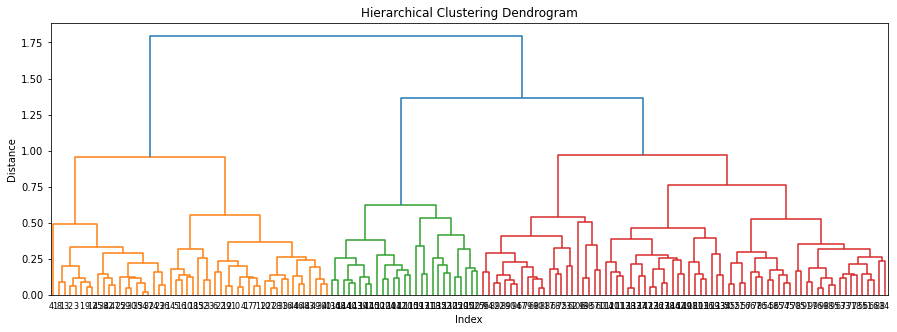

In [7]:
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(iris_norm, method="complete",metric="euclidean")
plt.figure(figsize=(15, 5));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [8]:
# help(linkage)
# Now applying AgglomerativeClustering choosing 3 as clusters from the dendrogram
from sklearn.cluster import AgglomerativeClustering 

In [9]:
h_complete	=	AgglomerativeClustering(n_clusters=4,	linkage='complete',affinity = "euclidean").fit(iris_norm)

In [10]:
cluster_labels=pd.Series(h_complete.labels_)
iris['clust']=cluster_labels # creating a  new column and assigning it to new column 
iris_clust = iris.iloc[:,[6,0,1,2,3,4,5]]
iris_clust.head()

,clust,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,0,2,4.9,3.0,1.4,0.2,Iris-setosa
2,0,3,4.7,3.2,1.3,0.2,Iris-setosa
3,0,4,4.6,3.1,1.5,0.2,Iris-setosa
4,0,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# getting aggregate mean of each cluster
iris_clust.iloc[:,2:6].groupby(iris_clust.clust).mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
clust,,,,
0,5.006000,3.418000,1.464000,0.244000
1,6.174510,2.890196,4.815686,1.615686
2,7.000000,3.159259,5.874074,2.174074
3,5.559091,2.477273,3.927273,1.204545


In [12]:
# creating a csv file 
iris_clust.to_csv("iris_clust.csv",encoding="utf-8")

In [13]:
import os
os.getcwd()

'C:\\Users\\shambhu\\Desktop\\Spark foundation\\task2'

# K Means Clustering

In [14]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np

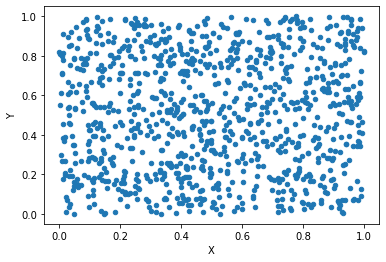

In [15]:
# Generating random uniform numbers 
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")
model1 = KMeans(n_clusters=5).fit(df_xy)

<AxesSubplot:xlabel='X', ylabel='Y'>

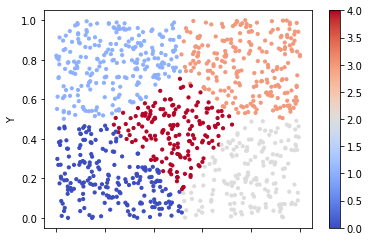

In [16]:
df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)

In [17]:
# Kmeans on iris Data set 
iris = pd.read_csv("C:\\Users\\shambhu\\Desktop\\Spark foundation\\iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

In [19]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(iris.iloc[:,:5])
type(df_norm)

pandas.core.frame.DataFrame

In [20]:
###### screw plot or elbow curve ############
k = list(range(2,23))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x213e069ee48>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

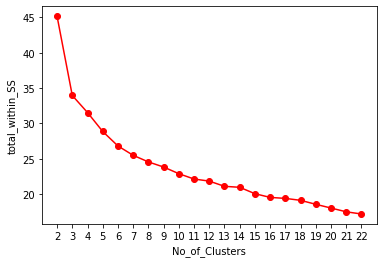

In [21]:
# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [22]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=3) 
model.fit(df_norm)

KMeans(n_clusters=3)

In [23]:
model.labels_ # getting the labels of clusters assigned to each row 
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
iris['clust']=md # creating a  new column and assigning it to new column 
df_norm.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,0.000000,0.222222,0.625000,0.067797,0.041667
1,0.006711,0.166667,0.416667,0.067797,0.041667
2,0.013423,0.111111,0.500000,0.050847,0.041667
3,0.020134,0.083333,0.458333,0.084746,0.041667
4,0.026846,0.194444,0.666667,0.067797,0.041667


In [24]:
iris.iloc[:,:6].groupby(iris.clust).mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
clust,,,,,
0,77.433962,5.915094,2.752830,4.294340,1.347170
1,25.500000,5.006000,3.418000,1.464000,0.244000
2,126.510638,6.653191,3.006383,5.595745,2.046809
